# 0.0 Imports

In [1]:
import pandas     as pd
import numpy      as np
import seaborn    as sns


#  viz
from matplotlib            import pyplot as plt
from IPython.display       import Image
from IPython.core.display  import HTML


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Help Functions

In [2]:
# adjust jupyter notebook viz
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# Import Data

In [61]:
df = pd.read_csv('Credit.csv')

# Data Summary


In [66]:
# drop columns 
df = df.drop( columns = 'Unnamed: 0', axis = 1)

In [67]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [68]:
# Separing numerical vars and categorical vars
cat_var = df.select_dtypes(include = ['object'])
num_var = df.select_dtypes(exclude = ['object'])

In [69]:
# apply mean, and median
mean_cols = pd.DataFrame(num_var.apply(np.mean)).T
median_cols = pd.DataFrame(num_var.apply(np.median)).T

# Disparsion - std, min, max, range, skew, kurtosis

dis_std = pd.DataFrame(num_var.apply(np.std)).T
dis_min = pd.DataFrame(num_var.apply(min)).T
dis_max = pd.DataFrame(num_var.apply(max)).T
dis_range = pd.DataFrame(num_var.apply(lambda x: x.max() - x.min())).T
dis_skew = pd.DataFrame(num_var.apply(lambda x: x.skew())).T
dis_kurtosis = pd.DataFrame(num_var.apply(lambda x: x.kurtosis())).T
counts = pd.DataFrame(num_var.apply(lambda x: x.count())).T

metrics = pd.concat([dis_min,
                     dis_max,
                     dis_range,
                     mean_cols,
                     median_cols,
                     dis_std,
                     dis_skew,
                     dis_kurtosis,
                     counts]).T.reset_index()

metrics.columns = ['atributes','min','max','range','mean','median','std','skew','kurtosis', 'counts']
metrics

,atributes,min,max,range,mean,median,std,skew,kurtosis,counts
0,Income,10.354,186.634,176.28,45.218885,33.1155,35.200190,1.742117,2.947476,400.0
1,Limit,855.000,13913.000,13058.00,4735.600000,4622.5000,2305.311793,0.837493,1.004247,400.0
2,Rating,93.000,982.000,889.00,354.940000,344.0000,154.530616,0.865394,1.060947,400.0
3,Cards,1.000,9.000,8.00,2.957500,3.0000,1.369560,0.791928,0.943953,400.0
4,Age,23.000,98.000,75.00,55.667500,56.0000,17.228231,0.011496,-1.065580,400.0
5,Education,5.000,20.000,15.00,13.450000,14.0000,3.121298,-0.329212,-0.578121,400.0
6,Balance,0.000,1999.000,1999.00,520.015000,459.5000,459.183819,0.584595,-0.527858,400.0


# Insights

In [ ]:
df['Age'].value_counts().head(10)

In [71]:
# criar  coluna com balanco positivo e negativo
balanco_positivo = df.loc[df["Balance"] > 0]
balanco_positivo.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,49.978810,5485.467742,405.051613,2.996774,55.606452,13.425806,670.987097
std,37.881628,2052.451743,137.967389,1.426740,17.341794,3.208904,413.904019
min,10.354000,1160.000000,126.000000,1.000000,23.000000,5.000000,5.000000
25%,23.150250,3976.250000,304.000000,2.000000,42.000000,11.000000,338.000000
50%,37.141000,5147.000000,380.000000,3.000000,55.500000,14.000000,637.500000
75%,63.740250,6453.250000,469.000000,4.000000,69.000000,16.000000,960.750000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


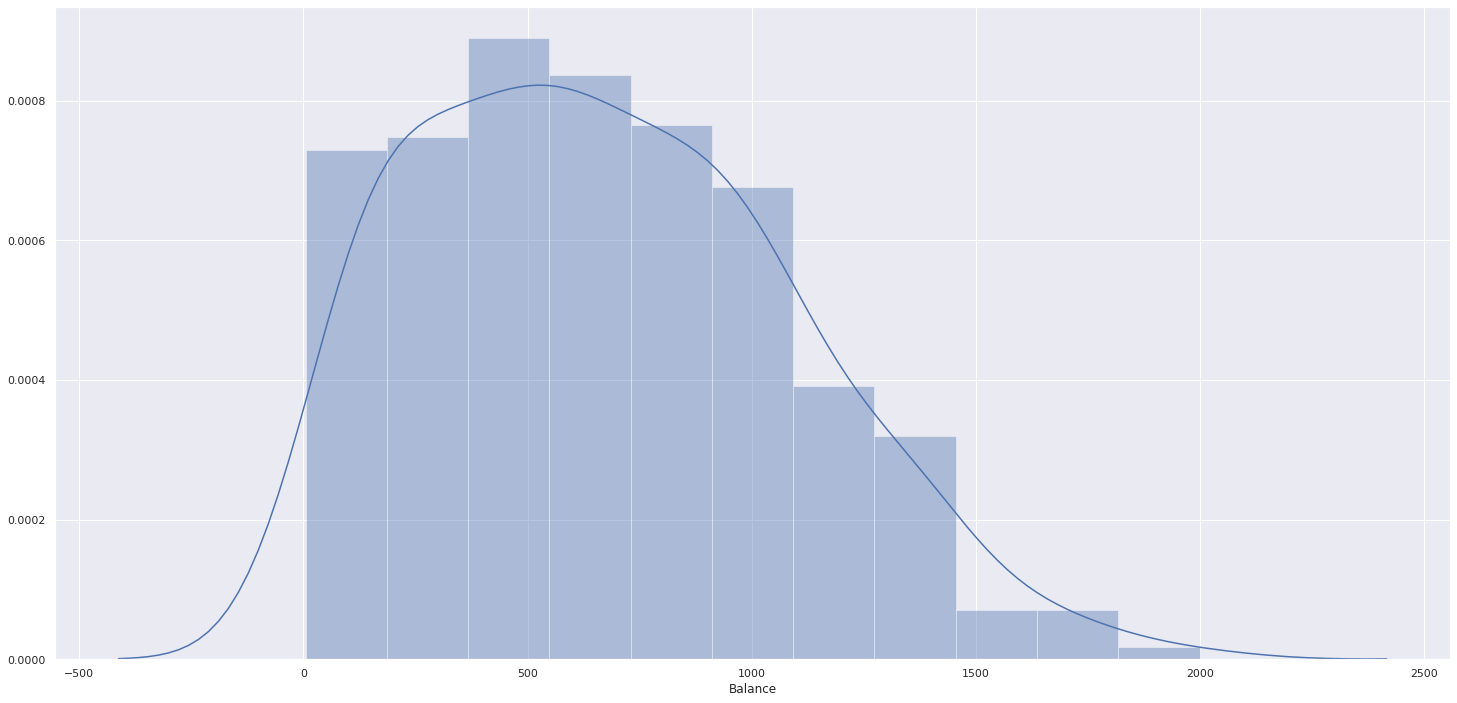

In [72]:
sns.distplot(balanco_positivo['Balance'])

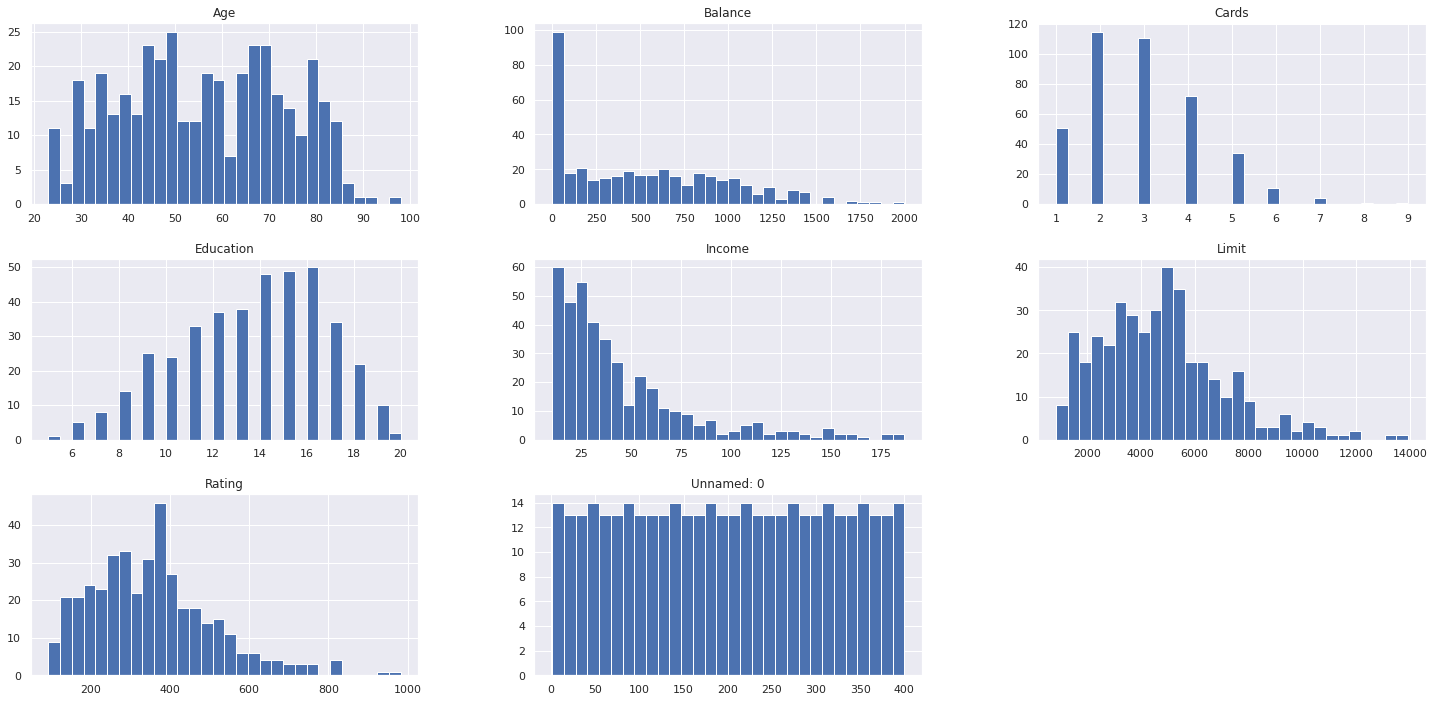

In [36]:
num_var.hist( bins = 30);


# Data Analysis

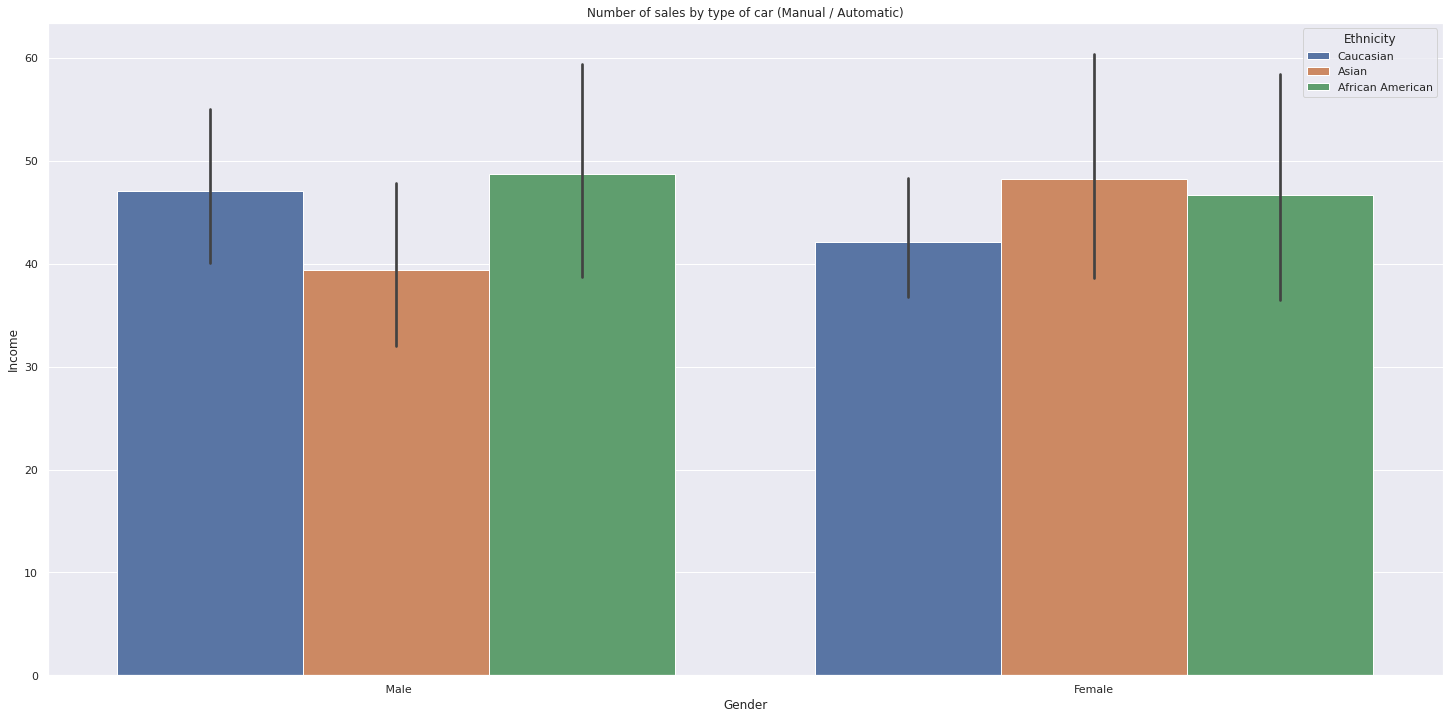

In [86]:
plt.title('Number of sales by type of car (Manual / Automatic)')
sns.barplot( x= 'Gender', y = 'Income', hue = 'Ethnicity', data = df);

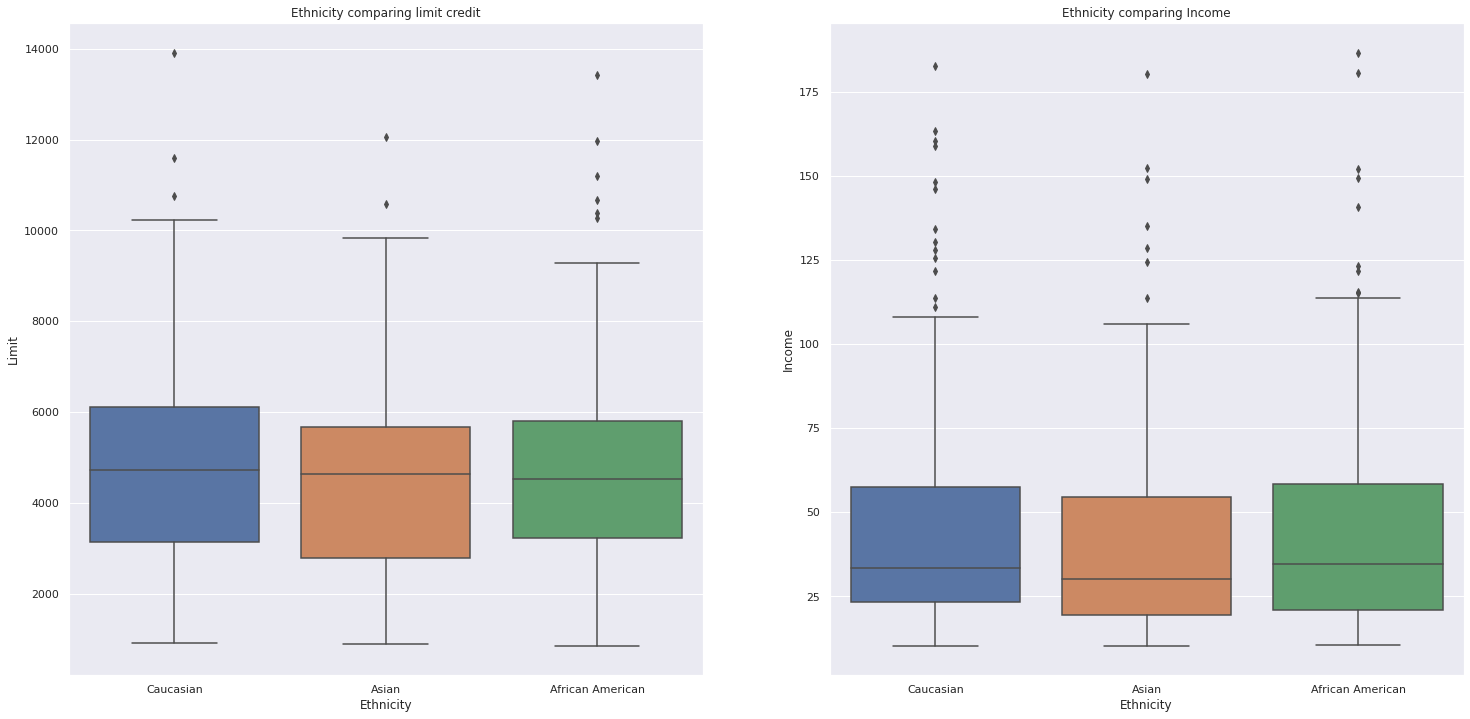

In [83]:
# Ethnicity comparing limit credit
plt.subplot(1,2,1)
plt.title('Ethnicity comparing limit credit')
sns.boxplot(x= 'Ethnicity', y ='Limit', data = df);

plt.subplot(1,2,2)
plt.title('Ethnicity comparing Income')
sns.boxplot(x= 'Ethnicity', y ='Income', data = df);

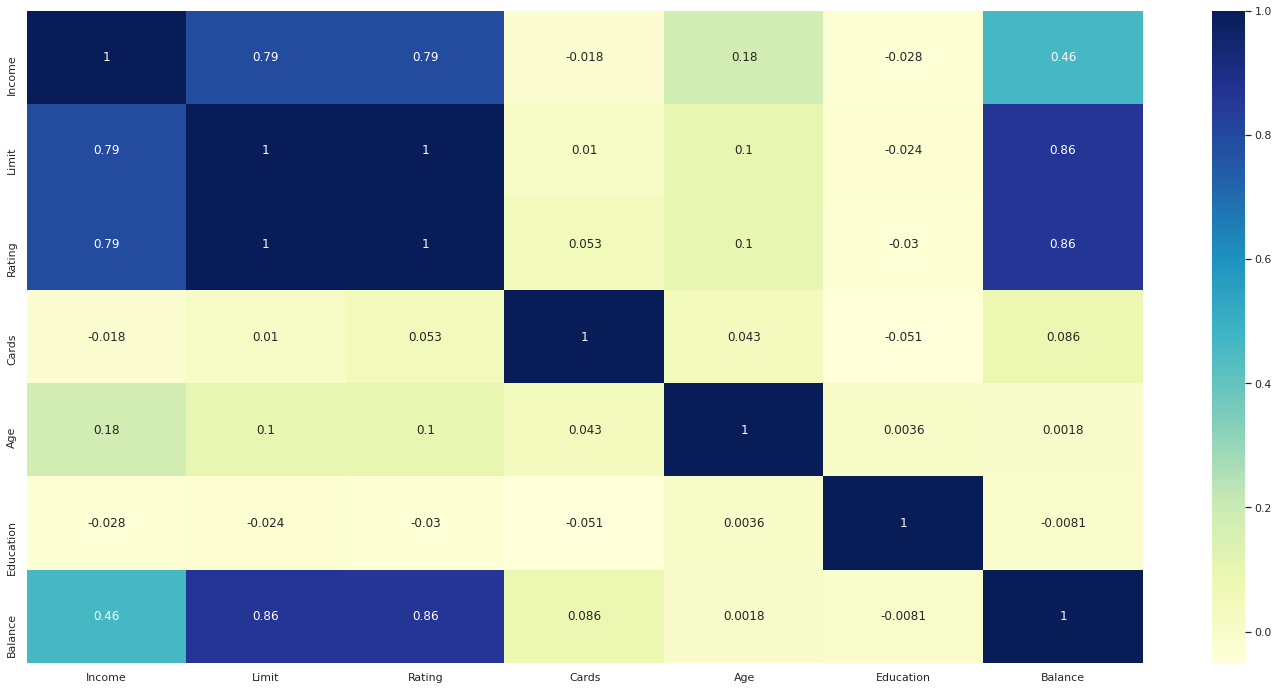

In [76]:
# correlation

# sns.heatmap(X, annot = True, cmap = "YlGnBu") #YlGnBu - color
sns.heatmap( df.corr(method= 'pearson'), annot = True, cmap = "YlGnBu");

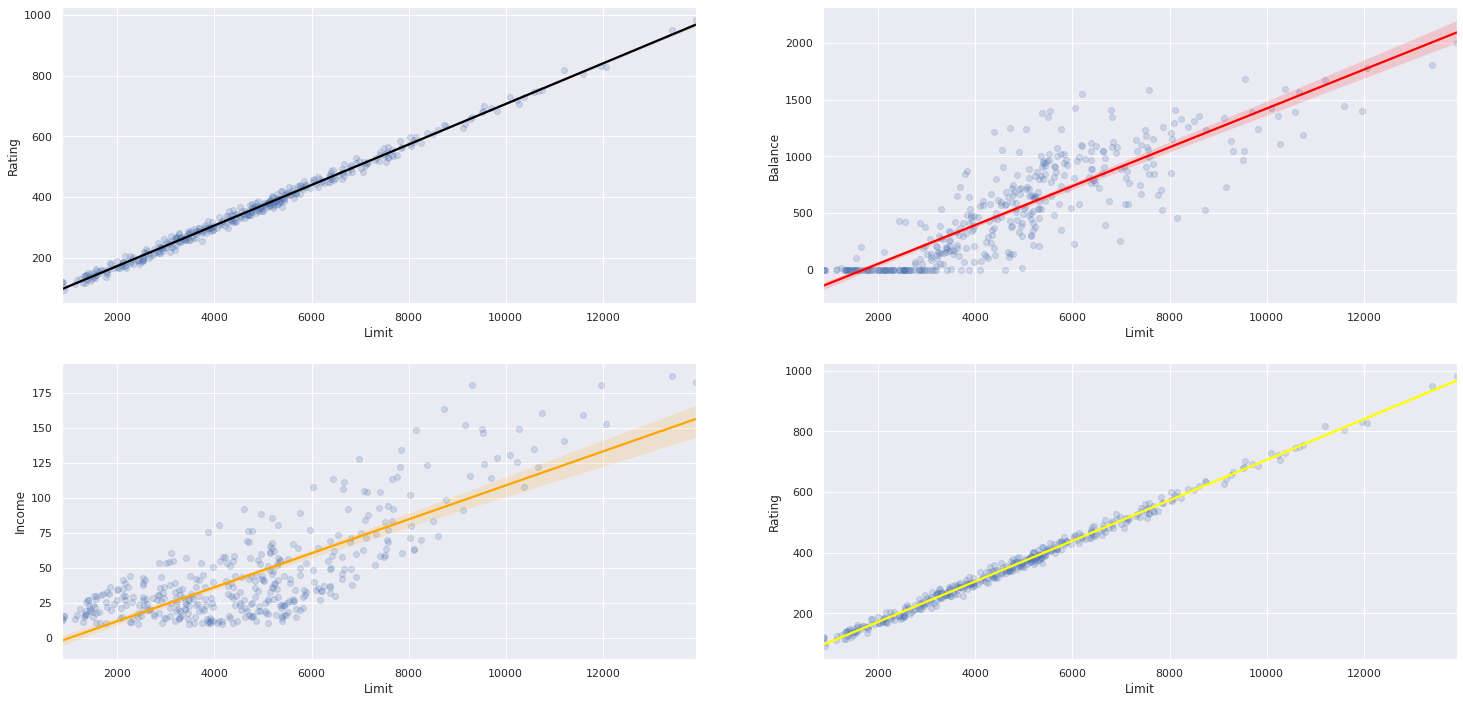

In [91]:
# grafico de correlacao de Limite e Rating
plt.subplot(2,2,1)
sns.regplot(x='Limit',
           y='Rating',
           data=df,
           scatter_kws={'alpha':0.2},
           line_kws={'color':'black'})
# grafico de correlacao de Limite e Balance

plt.subplot(2,2,2)
sns.regplot(x='Limit',
           y='Balance',
           data=df,
           scatter_kws={'alpha':0.2},
           line_kws={'color':'red'})

# grafico de correlacao de Limite e Income
plt.subplot(2,2,3)
sns.regplot(x='Limit',
           y='Income',
           data=df,
           scatter_kws={'alpha':0.2},
           line_kws={'color':'orange'})

# grafico de correlacao de Limite e Rating

plt.subplot(2,2,4)
sns.regplot(x='Limit',
           y='Rating',
           data=df,
           scatter_kws={'alpha':0.2},
           line_kws={'color':'yellow'})

# Categorical variables

In [92]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Positive
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,1
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,1
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,1


Ethnicity
African American    AxesSubplot(0.555556,0.125;0.344444x0.328261)
Asian               AxesSubplot(0.555556,0.125;0.344444x0.328261)
Caucasian           AxesSubplot(0.555556,0.125;0.344444x0.328261)
Name: Balance, dtype: object

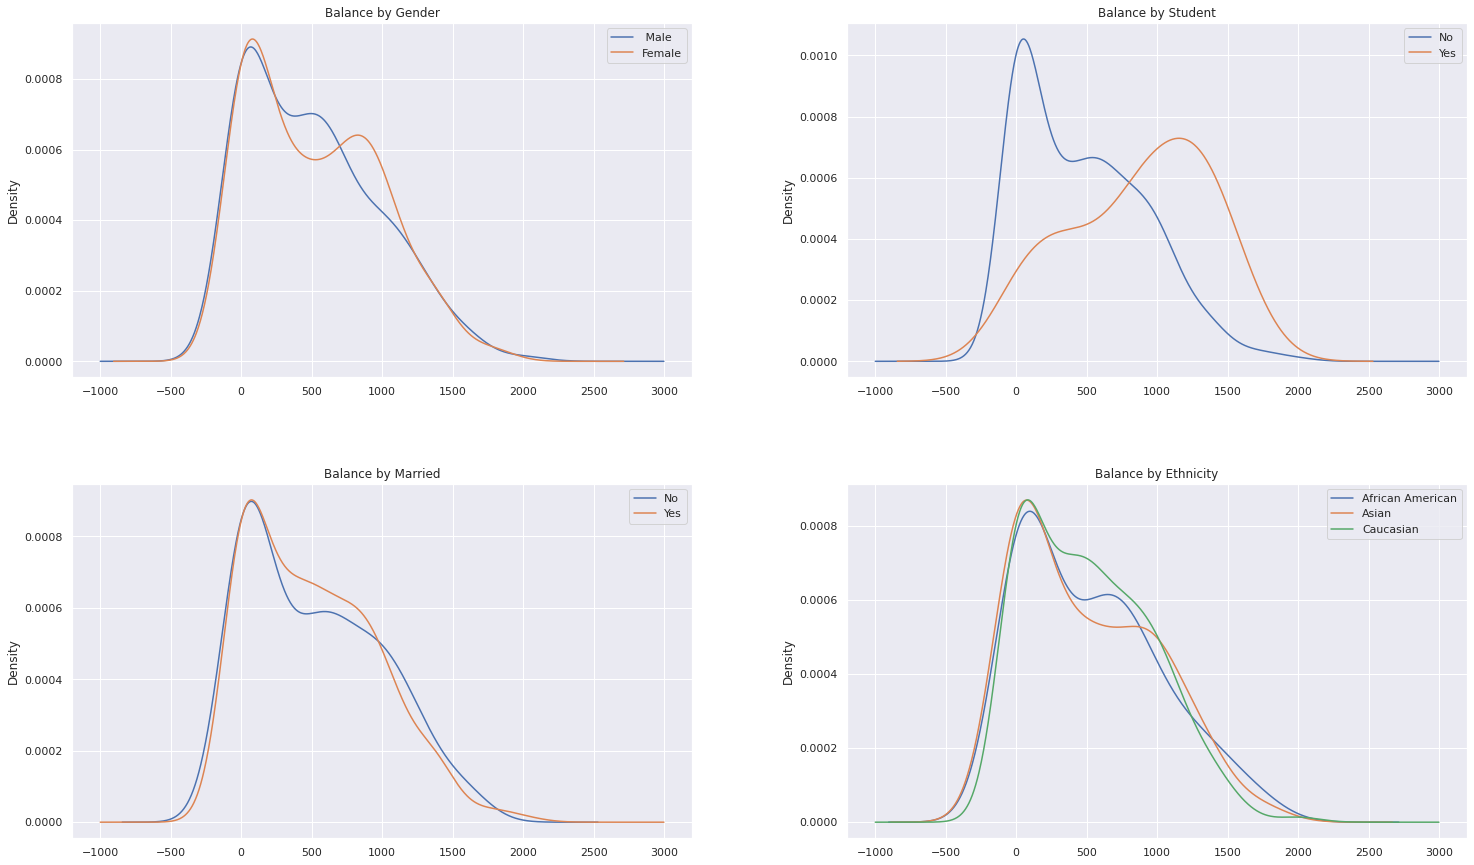

In [98]:
f, axes = plt.subplots(2, 2, figsize=(25, 15))
f.subplots_adjust(hspace=.3, wspace=.25)
df.groupby('Gender').Balance.plot(kind='kde', ax=axes[0][0], legend=True,  title='Balance by Gender')
df.groupby('Student').Balance.plot(kind='kde', ax=axes[0][1], legend=True, title='Balance by Student')
df.groupby('Married').Balance.plot(kind='kde', ax=axes[1][0], legend=True, title='Balance by Married')
df.groupby('Ethnicity').Balance.plot(kind='kde', ax=axes[1][1], legend=True, title='Balance by Ethnicity');


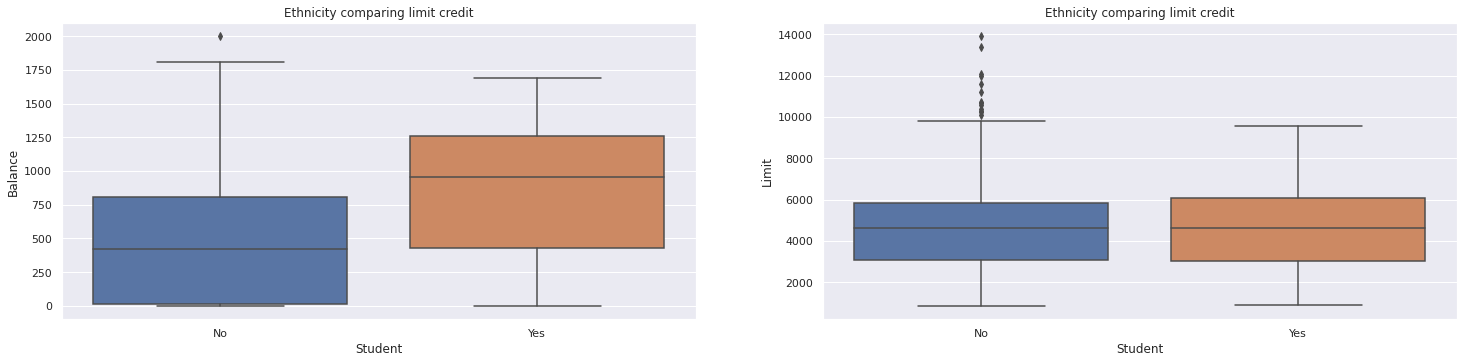

In [101]:
plt.subplot(2,2,1)
plt.title('Ethnicity comparing limit credit')
sns.boxplot(x='Student', y='Balance', data = df)

plt.subplot(2,2,2)
plt.title('Ethnicity comparing limit credit')
sns.boxplot(x='Student', y='Limit', data = df)



# Feature engineer


In [ ]:
# adicionando vaiavel credito positivo, yes = 1, negativo no = 0
df['Positive'] = np.where(df['Balance']> 0, '1', '0') 

df.Positive.describe()

In [74]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Positive
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,1
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,1
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,1


In [104]:
from sklearn.preprocessing import LabelEncoder

In [105]:
# encoding vars

label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
label_encoder3 = LabelEncoder()

#
X  = df.drop('Balance', axis = 1)
Y = df['Balance']

# Encoding de Variaveis
X['Ethnicity']         = label_encoder1.fit_transform( X['Ethnicity'] )
X['Married']           = label_encoder2.fit_transform( X['Married'] )
X['Student']           = label_encoder3.fit_transform( X['Student'] )
X['Gender']            = label_encoder3.fit_transform( X['Gender'] )

# Machine Learning Model

In [106]:
X.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Positive
0,14.891,3606,283,2,34,11,0,0,1,2,1
1,106.025,6645,483,3,82,15,1,1,1,1,1
2,104.593,7075,514,4,71,11,0,0,0,1,1
3,148.924,9504,681,3,36,11,1,0,0,1,1
4,55.882,4897,357,2,68,16,0,0,1,2,1


In [102]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [123]:
df = sm.add_constant(df)
model = smf.ols(formula=' Balance ~ + Income + Rating + Cards + Age + Education + Gender + Student +	Married + Ethnicity', data = df)
modelo1 = model.fit()

In [124]:
modelo1

In [119]:
df = sm.add_constant(df)
model_v2 = smf.ols(formula=' Balance ~ + Income + Rating + Cards + Age + Education + Gender + Student +	Married + Ethnicity + Positive', data = df)
modelo2 = model_v2.fit()

In [120]:
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1064.
Date:                Sat, 15 Aug 2020   Prob (F-statistic):          5.85e-282
Time:                        21:08:42   Log-Likelihood:                -2331.5
No. Observations:                 400   AIC:                             4687.
Df Residuals:                     388   BIC:                             4735.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -538.1210     28.490    -18.888      0.000    -594.134    -482.108
Gender[T.Female]          -5.5675      8.389     -0.664      0.507     -22.061      10.926
Student[T.Yes]           467.8931     14.529     32.203      0.000     439.327     496.459
Married[T.Yes]           -10.6555      8.714     -1.223      0.222     -27.788       6.477
Ethnicity[T.Asian]        13.1391     11.930      1.101      0.271     -10.315      36.594
Ethnicity[T.Caucasian]    13.6534     10.324      1.323      0.187      -6.644      33.951
Positive[T.1]           -208.1357     14.630    -14.226      0.000    -236.900    -179.371
Income                    -9.2807      0.224    -41.340      0.000      -9.722      -8.839
Rating                     4.5881      0.062     74.164      0.000       4.466       4.710
Cards                      3.3323      3.079      1.082      0.280      -2.721       9.386
Age                       -0.6741      0.249     -2.713      0.007      -1.163      -0.186
Education                 -0.6880      1.347     -0.511      0.610      -3.336       1.960
==============================================================================
Omnibus:                       13.835   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.476
Skew:                          -0.230   Prob(JB):                     1.32e-05
Kurtosis:                       4.066   Cond. No.                     2.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""